In [3]:
# FAZ-0 / BÖLÜM-01 : Gerekli kütüphanelerin kurulumu

!pip -q install pyarrow fastparquet scikit-learn imbalanced-learn xgboost matplotlib pandas

print("===== FAZ-0 / BÖLÜM-01 TAMAMLANDI =====")


===== FAZ-0 / BÖLÜM-01 TAMAMLANDI =====


In [4]:
# FAZ-0 / BÖLÜM-02 : Importlar ve görüntü ayarları

import os
import numpy as np
import pandas as pd
from pathlib import Path

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)

print("Python Version :", os.sys.version)
print("Pandas Version :", pd.__version__)

print("===== FAZ-0 / BÖLÜM-02 TAMAMLANDI =====")


Python Version : 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Pandas Version : 2.2.2
===== FAZ-0 / BÖLÜM-02 TAMAMLANDI =====


In [5]:
# FAZ-0 / BÖLÜM-03 : Profesyonel proje klasörlerinin oluşturulması

PROJECT_ROOT = Path("ml_adaptive_firewall")

folders = [
    "data/raw",
    "data/processed",
    "notebooks",
    "src/models",
    "models",
    "results",
    "api",
    "experiments"
]

for folder in folders:
    (PROJECT_ROOT / folder).mkdir(parents=True, exist_ok=True)

print("Proje Kök Dizini:", PROJECT_ROOT.resolve())
print("===== FAZ-0 / BÖLÜM-03 TAMAMLANDI =====")


Proje Kök Dizini: /content/ml_adaptive_firewall
===== FAZ-0 / BÖLÜM-03 TAMAMLANDI =====


In [6]:
# FAZ-0 / BÖLÜM-04 : Veri seti yolunun tanımlanması

# 🔴 KENDİ DOSYA YOLUNU BURAYA YAZ
DATA_PATH = "/content/UNSW_NB15_training-set.parquet"

print("Dosya mevcut mu? :", os.path.exists(DATA_PATH))
print("Veri Seti Yolu   :", DATA_PATH)

print("===== FAZ-0 / BÖLÜM-04 TAMAMLANDI =====")


Dosya mevcut mu? : True
Veri Seti Yolu   : /content/UNSW_NB15_training-set.parquet
===== FAZ-0 / BÖLÜM-04 TAMAMLANDI =====


In [7]:
# FAZ-0 / BÖLÜM-05 : CSV / Parquet otomatik veri yükleme

data_path = Path(DATA_PATH)
file_ext = data_path.suffix.lower()

if not data_path.exists():
    raise FileNotFoundError(f"❌ Veri seti bulunamadı: {DATA_PATH}")

if file_ext == ".csv":
    df = pd.read_csv(DATA_PATH)
elif file_ext in [".parquet", ".pq"]:
    df = pd.read_parquet(DATA_PATH)
else:
    raise ValueError(f"❌ Desteklenmeyen dosya tipi: {file_ext}")

print("Veri başarıyla yüklendi")
print("Boyut (Shape) :", df.shape)

display(df.head())

print("===== FAZ-0 / BÖLÜM-05 TAMAMLANDI =====")


Veri başarıyla yüklendi
Boyut (Shape) : (175341, 36)


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087486,14158.942383,8495.365234,0,0,24.295601,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,1,0,0,0,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473373,8395.112305,503571.312500,2,17,49.915001,15.432865,61.426933,1387.778320,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,1,1,0,0,0,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,1572.271851,60929.230469,1,6,231.875565,102.737206,17179.585938,11420.925781,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,1,1,0,0,0,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,2740.178955,3358.622070,1,3,152.876541,90.235725,259.080170,4991.784668,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,1,1,0,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373825,8561.499023,3987.059814,2,1,47.750332,75.659599,2415.837646,115.806999,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,2,1,0,0,0,0,Normal,0


===== FAZ-0 / BÖLÜM-05 TAMAMLANDI =====


In [8]:
# FAZ-0 / BÖLÜM-06 : Label sütununun tespiti ve dağılım analizi

print("Toplam kolon sayısı:", df.shape[1])
print("İlk 20 kolon:")
print(list(df.columns[:20]))

label_candidates = [
    c for c in df.columns
    if c.lower() in ["label", "class", "attack_cat", "target", "y"]
]

print("Label adayı sütunlar:", label_candidates)

if "Label" in df.columns:
    print("\nLabel dağılımı:")
    print(df["Label"].value_counts().head(20))

print("===== FAZ-0 / BÖLÜM-06 TAMAMLANDI =====")


Toplam kolon sayısı: 36
İlk 20 kolon:
['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb']
Label adayı sütunlar: ['attack_cat', 'label']
===== FAZ-0 / BÖLÜM-06 TAMAMLANDI =====


In [10]:
# FAZ-1 / BÖLÜM-01 : Dataset'in genel resmini çıkar (shape, kolonlar, örnekler, tipler)

print("===== FAZ-1 / BÖLÜM-01 BAŞLIYOR =====")

# 1) Boyut bilgisi
print("\n[1] BOYUT (SHAPE)")
print("Satır sayısı :", df.shape[0])
print("Sütun sayısı :", df.shape[1])

# 2) Kolon listesi
print("\n[2] KOLONLAR")
print(list(df.columns))

# 3) İlk ve son örnekler (kontrol)
print("\n[3] İLK 3 SATIR")
display(df.head(3))

print("\n[4] SON 3 SATIR")
display(df.tail(3))

# 4) Veri tipleri
print("\n[5] VERİ TİPLERİ (dtypes)")
display(df.dtypes)

print("\n[6] VERİ TİPİ DAĞILIMI")
display(df.dtypes.value_counts())

# 5) Boş değer kontrolü (sıfır mı?)
print("\n[7] EKSİK (NaN) DEĞER KONTROLÜ")
na_counts = df.isna().sum().sort_values(ascending=False)
display(na_counts.head(15))
print("Toplam NaN sayısı:", int(na_counts.sum()))

# 6) Duplicate satır kontrolü
print("\n[8] DUPLICATE SATIR KONTROLÜ")
dup_count = int(df.duplicated().sum())
print("Duplicate satır sayısı:", dup_count)

print("\n===== FAZ-1 / BÖLÜM-01 TAMAMLANDI =====")


===== FAZ-1 / BÖLÜM-01 BAŞLIYOR =====

[1] BOYUT (SHAPE)
Satır sayısı : 175341
Sütun sayısı : 36

[2] KOLONLAR
['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports', 'attack_cat', 'label']

[3] İLK 3 SATIR


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087486,14158.942383,8495.365234,0,0,24.295601,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,1,0,0,0,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473373,8395.112305,503571.312500,2,17,49.915001,15.432865,61.426933,1387.778320,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,1,1,0,0,0,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,1572.271851,60929.230469,1,6,231.875565,102.737206,17179.585938,11420.925781,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,1,1,0,0,0,0,Normal,0



[4] SON 3 SATIR


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
175338,0.000009,udp,dns,INT,2,0,114,0,111111.109375,50666664.0,0.0,0,0,0.009,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,57,0,0,0,3,3,0,0,0,0,Generic,1
175339,0.000009,udp,dns,INT,2,0,114,0,111111.109375,50666664.0,0.0,0,0,0.009,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,57,0,0,0,30,14,0,0,0,0,Generic,1
175340,0.000009,udp,dns,INT,2,0,114,0,111111.109375,50666664.0,0.0,0,0,0.009,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,57,0,0,0,30,16,0,0,0,0,Generic,1



[5] VERİ TİPLERİ (dtypes)


,0
dur,float32
proto,category
service,category
state,category
spkts,int16
dpkts,int16
sbytes,int32
dbytes,int32
rate,float32
sload,float32



[6] VERİ TİPİ DAĞILIMI


,count
float32,11
int16,9
int8,7
int32,3
int64,2
category,1
category,1
category,1
category,1



[7] EKSİK (NaN) DEĞER KONTROLÜ


,0
dur,0
proto,0
service,0
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0
sload,0


Toplam NaN sayısı: 0

[8] DUPLICATE SATIR KONTROLÜ
Duplicate satır sayısı: 78519

===== FAZ-1 / BÖLÜM-01 TAMAMLANDI =====


===== FAZ-1 / BÖLÜM-02 BAŞLIYOR =====

[1] LABEL DAĞILIMI (COUNT)
label
0     56000
1    119341
Name: count, dtype: int64

[2] LABEL ORANLARI (%)
label
0    31.94
1    68.06
Name: count, dtype: float64

[3] IMBALANCE RATIO (Normal/Attack): 0.469


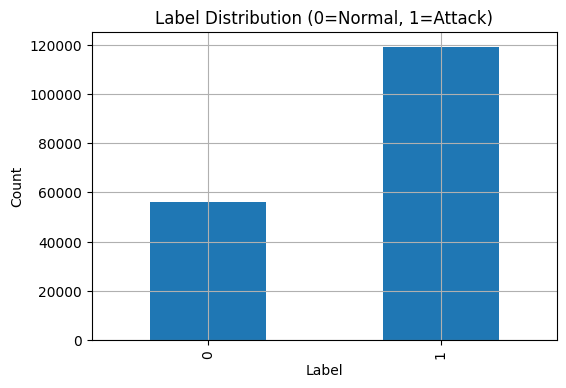

===== FAZ-1 / BÖLÜM-02 TAMAMLANDI =====


In [11]:
# FAZ-1 / BÖLÜM-02 : Binary label dağılımı (Normal vs Attack) + oran + grafik

print("===== FAZ-1 / BÖLÜM-02 BAŞLIYOR =====")

# 1) Label dağılımı
label_counts = df["label"].value_counts().sort_index()
label_ratio = (label_counts / label_counts.sum() * 100).round(2)

print("\n[1] LABEL DAĞILIMI (COUNT)")
print(label_counts)

print("\n[2] LABEL ORANLARI (%)")
print(label_ratio)

# 2) Basit imbalance metriği
normal_count = int(label_counts.get(0, 0))
attack_count = int(label_counts.get(1, 0))

if attack_count > 0:
    imbalance_ratio = round(normal_count / attack_count, 3)
else:
    imbalance_ratio = None

print("\n[3] IMBALANCE RATIO (Normal/Attack):", imbalance_ratio)

# 3) Grafik
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
label_counts.plot(kind="bar")
plt.title("Label Distribution (0=Normal, 1=Attack)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.grid(True)
plt.show()

print("===== FAZ-1 / BÖLÜM-02 TAMAMLANDI =====")


===== FAZ-1 / BÖLÜM-03 BAŞLIYOR =====

[1] ATTACK_CAT DAĞILIMI (COUNT)
attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64

[2] ATTACK_CAT DAĞILIMI (%)
attack_cat
Normal            31.94
Generic           22.81
Exploits          19.04
Fuzzers           10.37
DoS                6.99
Reconnaissance     5.98
Analysis           1.14
Backdoor           1.00
Shellcode          0.65
Worms              0.07
Name: count, dtype: float64


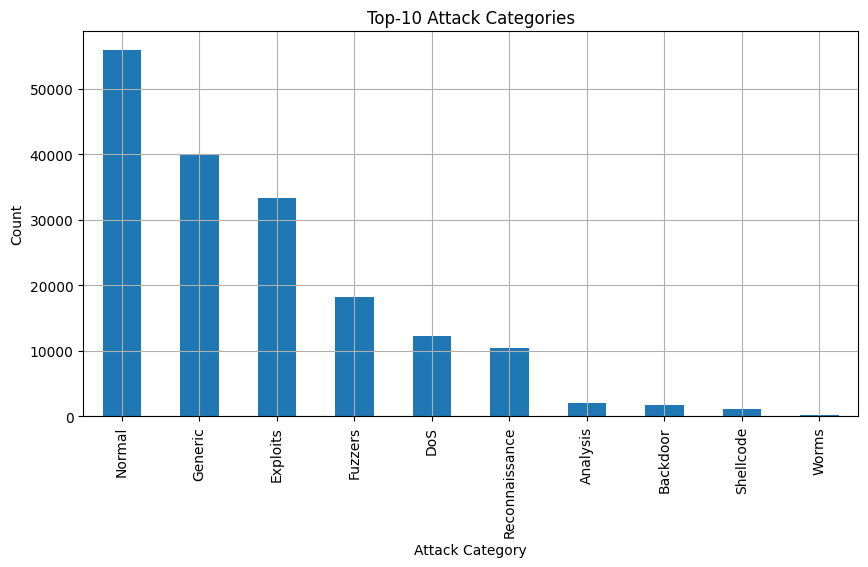

===== FAZ-1 / BÖLÜM-03 TAMAMLANDI =====


In [12]:
# FAZ-1 / BÖLÜM-03 : attack_cat dağılımı (multi-class EDA)

print("===== FAZ-1 / BÖLÜM-03 BAŞLIYOR =====")

# 1) attack_cat dağılımı (count)
attack_counts = df["attack_cat"].value_counts()

print("\n[1] ATTACK_CAT DAĞILIMI (COUNT)")
print(attack_counts)

# 2) Yüzdelik dağılım
attack_ratio = (attack_counts / attack_counts.sum() * 100).round(2)

print("\n[2] ATTACK_CAT DAĞILIMI (%)")
print(attack_ratio)

# 3) Grafik (Top-10 saldırı türü)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
attack_counts.head(10).plot(kind="bar")
plt.title("Top-10 Attack Categories")
plt.xlabel("Attack Category")
plt.ylabel("Count")
plt.grid(True)
plt.show()

print("===== FAZ-1 / BÖLÜM-03 TAMAMLANDI =====")


In [13]:
# FAZ-1 / BÖLÜM-04 : Duplicate satır analizi ve karar aşaması

print("===== FAZ-1 / BÖLÜM-04 BAŞLIYOR =====")

# 1) Toplam duplicate sayısı
total_duplicates = df.duplicated().sum()
total_rows = len(df)

print("\n[1] DUPLICATE GENEL DURUM")
print("Toplam satır      :", total_rows)
print("Duplicate satır   :", total_duplicates)
print("Duplicate oranı % :", round(total_duplicates / total_rows * 100, 2))

# 2) Duplicate satırların label dağılımı
dup_df = df[df.duplicated()]

print("\n[2] DUPLICATE SATIRLARDA LABEL DAĞILIMI")
print(dup_df["label"].value_counts())

# 3) Duplicate olmayan (unique) satırlarda label dağılımı
unique_df = df.drop_duplicates()

print("\n[3] UNIQUE SATIRLARDA LABEL DAĞILIMI")
print(unique_df["label"].value_counts())

# 4) Oransal karşılaştırma
dup_ratio = dup_df["label"].value_counts(normalize=True).round(3)
unique_ratio = unique_df["label"].value_counts(normalize=True).round(3)

print("\n[4] DUPLICATE LABEL ORANLARI")
print(dup_ratio)

print("\n[5] UNIQUE LABEL ORANLARI")
print(unique_ratio)

print("\n===== FAZ-1 / BÖLÜM-04 TAMAMLANDI =====")


===== FAZ-1 / BÖLÜM-04 BAŞLIYOR =====

[1] DUPLICATE GENEL DURUM
Toplam satır      : 175341
Duplicate satır   : 78519
Duplicate oranı % : 44.78

[2] DUPLICATE SATIRLARDA LABEL DAĞILIMI
label
1    71413
0     7106
Name: count, dtype: int64

[3] UNIQUE SATIRLARDA LABEL DAĞILIMI
label
0    48894
1    47928
Name: count, dtype: int64

[4] DUPLICATE LABEL ORANLARI
label
1    0.909
0    0.091
Name: proportion, dtype: float64

[5] UNIQUE LABEL ORANLARI
label
0    0.505
1    0.495
Name: proportion, dtype: float64

===== FAZ-1 / BÖLÜM-04 TAMAMLANDI =====


In [14]:
# FAZ-1 / BÖLÜM-05 : Duplicate satırların kalıcı olarak kaldırılması

print("===== FAZ-1 / BÖLÜM-05 BAŞLIYOR =====")

# 1) Temizleme öncesi boyut
before_shape = df.shape
print("Önce (Shape):", before_shape)

# 2) Duplicate silme
df = df.drop_duplicates().reset_index(drop=True)

# 3) Temizleme sonrası boyut
after_shape = df.shape
print("Sonra (Shape):", after_shape)

# 4) Silinen satır sayısı
removed = before_shape[0] - after_shape[0]
print("Silinen duplicate satır sayısı:", removed)

# 5) Yeni label dağılımı
print("\nYeni LABEL dağılımı:")
print(df["label"].value_counts())

print("===== FAZ-1 / BÖLÜM-05 TAMAMLANDI =====")


===== FAZ-1 / BÖLÜM-05 BAŞLIYOR =====
Önce (Shape): (175341, 36)
Sonra (Shape): (96822, 36)
Silinen duplicate satır sayısı: 78519

Yeni LABEL dağılımı:
label
0    48894
1    47928
Name: count, dtype: int64
===== FAZ-1 / BÖLÜM-05 TAMAMLANDI =====


In [15]:
# FAZ-2 / BÖLÜM-01 : Firewall için kullanılmayacak feature'ları belirleme

print("===== FAZ-2 / BÖLÜM-01 BAŞLIYOR =====")

# 1) Label ve attack_cat hedef değişkenler
TARGET_COL = "label"
ATTACK_CAT_COL = "attack_cat"

# 2) Model girişinde KULLANILMAYACAK kolonlar
# attack_cat sadece analiz için, model girişine sokulmayacak
DROP_COLS = [
    TARGET_COL,
    ATTACK_CAT_COL
]

print("\n[1] Hedef değişken:", TARGET_COL)
print("[2] Modelden çıkarılacak kolonlar:", DROP_COLS)

# 3) Girdi feature seti
X_cols = [c for c in df.columns if c not in DROP_COLS]

print("\n[3] Toplam feature sayısı:", len(X_cols))
print("İlk 15 feature:")
print(X_cols[:15])

print("===== FAZ-2 / BÖLÜM-01 TAMAMLANDI =====")


===== FAZ-2 / BÖLÜM-01 BAŞLIYOR =====

[1] Hedef değişken: label
[2] Modelden çıkarılacak kolonlar: ['label', 'attack_cat']

[3] Toplam feature sayısı: 34
İlk 15 feature:
['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt']
===== FAZ-2 / BÖLÜM-01 TAMAMLANDI =====


In [16]:
# FAZ-2 / BÖLÜM-02 : Kategorik ve sayısal feature ayrımı

print("===== FAZ-2 / BÖLÜM-02 BAŞLIYOR =====")

# 1) Feature listesi
X_cols = [c for c in df.columns if c not in ["label", "attack_cat"]]

# 2) Kategorik feature'lar (dtype == category veya object)
categorical_features = [
    c for c in X_cols
    if str(df[c].dtype) in ["category", "object"]
]

# 3) Sayısal feature'lar
numerical_features = [
    c for c in X_cols
    if c not in categorical_features
]

print("\n[1] KATEGORİK FEATURE'LAR")
print("Sayı:", len(categorical_features))
print(categorical_features)

print("\n[2] SAYISAL FEATURE'LAR")
print("Sayı:", len(numerical_features))
print(numerical_features[:15], "...")

print("\n[3] KONTROL")
print("Toplam =", len(categorical_features) + len(numerical_features))

print("===== FAZ-2 / BÖLÜM-02 TAMAMLANDI =====")


===== FAZ-2 / BÖLÜM-02 BAŞLIYOR =====

[1] KATEGORİK FEATURE'LAR
Sayı: 3
['proto', 'service', 'state']

[2] SAYISAL FEATURE'LAR
Sayı: 31
['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin'] ...

[3] KONTROL
Toplam = 34
===== FAZ-2 / BÖLÜM-02 TAMAMLANDI =====


In [17]:
# FAZ-2 / BÖLÜM-03 : Kategorik feature'lar için One-Hot Encoding

print("===== FAZ-2 / BÖLÜM-03 BAŞLIYOR =====")

from sklearn.preprocessing import OneHotEncoder

# 1) Feature setleri
X = df.drop(columns=["label", "attack_cat"])
y = df["label"]

categorical_features = ["proto", "service", "state"]
numerical_features = [c for c in X.columns if c not in categorical_features]

print("\n[1] Encoding edilecek kategorik feature'lar:", categorical_features)
print("[2] Sayısal feature sayısı:", len(numerical_features))

# 2) One-Hot Encoder
ohe = OneHotEncoder(
    sparse_output=False,
    handle_unknown="ignore"
)

# 3) Kategorik feature'ları encode et
X_cat = ohe.fit_transform(X[categorical_features])

# 4) Yeni kolon isimleri
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

# 5) DataFrame'e çevir
X_cat_df = pd.DataFrame(
    X_cat,
    columns=ohe_feature_names,
    index=X.index
)

# 6) Sayısal feature'lar
X_num_df = X[numerical_features]

# 7) Birleştir
X_encoded = pd.concat([X_num_df, X_cat_df], axis=1)

print("\n[3] Encoding SONRASI feature sayısı:", X_encoded.shape[1])
print("[4] İlk 10 yeni kolon:")
print(list(X_encoded.columns[-10:]))

print("===== FAZ-2 / BÖLÜM-03 TAMAMLANDI =====")


===== FAZ-2 / BÖLÜM-03 BAŞLIYOR =====

[1] Encoding edilecek kategorik feature'lar: ['proto', 'service', 'state']
[2] Sayısal feature sayısı: 31

[3] Encoding SONRASI feature sayısı: 186
[4] İlk 10 yeni kolon:
['service_ssl', 'state_CON', 'state_ECO', 'state_FIN', 'state_INT', 'state_PAR', 'state_REQ', 'state_RST', 'state_URN', 'state_no']
===== FAZ-2 / BÖLÜM-03 TAMAMLANDI =====


In [19]:
# FAZ-2 / BÖLÜM-04.1 : models klasörünü garanti altına al ve scaler'ı kaydet

print("===== FAZ-2 / BÖLÜM-04.1 BAŞLIYOR =====")

from pathlib import Path
import joblib

# 1) models klasörünü oluştur (yoksa)
models_dir = Path("models")
models_dir.mkdir(parents=True, exist_ok=True)

# 2) scaler kaydet
scaler_path = models_dir / "scaler.pkl"
joblib.dump(scaler, scaler_path)

print("Scaler başarıyla kaydedildi:", scaler_path.resolve())

print("===== FAZ-2 / BÖLÜM-04.1 TAMAMLANDI =====")


===== FAZ-2 / BÖLÜM-04.1 BAŞLIYOR =====
Scaler başarıyla kaydedildi: /content/models/scaler.pkl
===== FAZ-2 / BÖLÜM-04.1 TAMAMLANDI =====


In [20]:
# FAZ-3 / BÖLÜM-01 : Stratified Train / Validation / Test Split

print("===== FAZ-3 / BÖLÜM-01 BAŞLIYOR =====")

from sklearn.model_selection import train_test_split
import numpy as np

# 1) İlk split: Train (%70) + Temp (%30)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled,
    y,
    test_size=0.30,
    stratify=y,
    random_state=42
)

# 2) İkinci split: Validation (%15) + Test (%15)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.50,
    stratify=y_temp,
    random_state=42
)

# 3) Boyut kontrolü
print("\n[1] SET BOYUTLARI")
print("Train :", X_train.shape)
print("Validation :", X_val.shape)
print("Test :", X_test.shape)

# 4) Label dağılım kontrolü
def label_ratio(y_data):
    vals, counts = np.unique(y_data, return_counts=True)
    return dict(zip(vals, (counts / counts.sum()).round(3)))

print("\n[2] LABEL ORANLARI")
print("Train :", label_ratio(y_train))
print("Validation :", label_ratio(y_val))
print("Test :", label_ratio(y_test))

print("===== FAZ-3 / BÖLÜM-01 TAMAMLANDI =====")


===== FAZ-3 / BÖLÜM-01 BAŞLIYOR =====

[1] SET BOYUTLARI
Train : (67775, 186)
Validation : (14523, 186)
Test : (14524, 186)

[2] LABEL ORANLARI
Train : {np.int8(0): np.float64(0.505), np.int8(1): np.float64(0.495)}
Validation : {np.int8(0): np.float64(0.505), np.int8(1): np.float64(0.495)}
Test : {np.int8(0): np.float64(0.505), np.int8(1): np.float64(0.495)}
===== FAZ-3 / BÖLÜM-01 TAMAMLANDI =====


In [21]:
# FAZ-3 / BÖLÜM-02 : Random Forest baseline model eğitimi

print("===== FAZ-3 / BÖLÜM-02 BAŞLIYOR =====")

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# 1) Model tanımı
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# 2) Model eğitimi
rf_model.fit(X_train, y_train)

print("\n[1] Model eğitimi tamamlandı")

# 3) Validation tahminleri
y_val_pred = rf_model.predict(X_val)

# 4) Metrikler
acc = accuracy_score(y_val, y_val_pred)
prec = precision_score(y_val, y_val_pred)
rec = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("\n[2] VALIDATION METRİKLERİ")
print("Accuracy :", round(acc, 4))
print("Precision:", round(prec, 4))
print("Recall   :", round(rec, 4))
print("F1-score :", round(f1, 4))

# 5) Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
print("\n[3] CONFUSION MATRIX (Validation)")
print(cm)

# 6) Classification report
print("\n[4] CLASSIFICATION REPORT")
print(classification_report(y_val, y_val_pred))

print("===== FAZ-3 / BÖLÜM-02 TAMAMLANDI =====")


===== FAZ-3 / BÖLÜM-02 BAŞLIYOR =====

[1] Model eğitimi tamamlandı

[2] VALIDATION METRİKLERİ
Accuracy : 0.9191
Precision: 0.8992
Recall   : 0.9421
F1-score : 0.9202

[3] CONFUSION MATRIX (Validation)
[[6575  759]
 [ 416 6773]]

[4] CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7334
           1       0.90      0.94      0.92      7189

    accuracy                           0.92     14523
   macro avg       0.92      0.92      0.92     14523
weighted avg       0.92      0.92      0.92     14523

===== FAZ-3 / BÖLÜM-02 TAMAMLANDI =====


In [22]:
# FAZ-3 / BÖLÜM-03 : Random Forest feature importance analizi

print("===== FAZ-3 / BÖLÜM-03 BAŞLIYOR =====")

import pandas as pd
import numpy as np

# 1) Importance değerleri
importances = rf_model.feature_importances_

# 2) Feature isimleri
feature_names = X_encoded.columns

# 3) DataFrame oluştur
fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

# 4) Top-15 feature
print("\n[1] TOP-15 FEATURE IMPORTANCE")
display(fi_df.head(15))

# 5) Özet
print("\n[2] İlk 15 feature toplam katkısı:",
      round(fi_df.head(15)["importance"].sum(), 4))

print("===== FAZ-3 / BÖLÜM-03 TAMAMLANDI =====")


===== FAZ-3 / BÖLÜM-03 BAŞLIYOR =====

[1] TOP-15 FEATURE IMPORTANCE


,feature,importance
20,ackdat,0.087970
19,synack,0.084810
18,tcprtt,0.081713
7,dload,0.066147
11,dinpkt,0.059059
5,rate,0.048866
0,dur,0.047230
6,sload,0.045896
3,sbytes,0.041802
21,smean,0.039306



[2] İlk 15 feature toplam katkısı: 0.7795
===== FAZ-3 / BÖLÜM-03 TAMAMLANDI =====


In [23]:
# FAZ-3 / BÖLÜM-04 : XGBoost ana model eğitimi

print("===== FAZ-3 / BÖLÜM-04 BAŞLIYOR =====")

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# 1) Model tanımı
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

# 2) Model eğitimi
xgb_model.fit(X_train, y_train)

print("\n[1] XGBoost eğitimi tamamlandı")

# 3) Validation tahminleri
y_val_pred_xgb = xgb_model.predict(X_val)

# 4) Metrikler
acc = accuracy_score(y_val, y_val_pred_xgb)
prec = precision_score(y_val, y_val_pred_xgb)
rec = recall_score(y_val, y_val_pred_xgb)
f1 = f1_score(y_val, y_val_pred_xgb)

print("\n[2] VALIDATION METRİKLERİ (XGBOOST)")
print("Accuracy :", round(acc, 4))
print("Precision:", round(prec, 4))
print("Recall   :", round(rec, 4))
print("F1-score :", round(f1, 4))

# 5) Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred_xgb)
print("\n[3] CONFUSION MATRIX (Validation)")
print(cm)

# 6) Classification report
print("\n[4] CLASSIFICATION REPORT")
print(classification_report(y_val, y_val_pred_xgb))

print("===== FAZ-3 / BÖLÜM-04 TAMAMLANDI =====")


===== FAZ-3 / BÖLÜM-04 BAŞLIYOR =====

[1] XGBoost eğitimi tamamlandı

[2] VALIDATION METRİKLERİ (XGBOOST)
Accuracy : 0.9234
Precision: 0.9045
Recall   : 0.9451
F1-score : 0.9244

[3] CONFUSION MATRIX (Validation)
[[6617  717]
 [ 395 6794]]

[4] CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7334
           1       0.90      0.95      0.92      7189

    accuracy                           0.92     14523
   macro avg       0.92      0.92      0.92     14523
weighted avg       0.92      0.92      0.92     14523

===== FAZ-3 / BÖLÜM-04 TAMAMLANDI =====


In [24]:
# FAZ-3 / BÖLÜM-05 : Random Forest vs XGBoost karşılaştırma tablosu

print("===== FAZ-3 / BÖLÜM-05 BAŞLIYOR =====")

import pandas as pd

comparison_df = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost"],
    "Accuracy": [0.9191, 0.9234],
    "Precision": [0.8992, 0.9045],
    "Recall": [0.9421, 0.9451],
    "F1-Score": [0.9202, 0.9244],
    "False Positive": [759, 717],
    "False Negative": [416, 395]
})

display(comparison_df)

print("===== FAZ-3 / BÖLÜM-05 TAMAMLANDI =====")


===== FAZ-3 / BÖLÜM-05 BAŞLIYOR =====


,Model,Accuracy,Precision,Recall,F1-Score,False Positive,False Negative
0,Random Forest,0.9191,0.8992,0.9421,0.9202,759,416
1,XGBoost,0.9234,0.9045,0.9451,0.9244,717,395


===== FAZ-3 / BÖLÜM-05 TAMAMLANDI =====


In [25]:
# FAZ-3 / BÖLÜM-06 : CatBoost model eğitimi ve validation değerlendirmesi

print("===== FAZ-3 / BÖLÜM-06 BAŞLIYOR =====")

# 0) Gerekli kurulum (ilk kez çalışıyorsan)
!pip -q install catboost

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# 1) Model tanımı
cat_model = CatBoostClassifier(
    iterations=500,
    depth=8,
    learning_rate=0.05,
    loss_function="Logloss",
    eval_metric="F1",
    random_seed=42,
    verbose=False
)

# 2) Model eğitimi
cat_model.fit(X_train, y_train)

print("\n[1] CatBoost eğitimi tamamlandı")

# 3) Validation tahminleri
y_val_pred_cat = cat_model.predict(X_val)

# 4) Metrikler
acc = accuracy_score(y_val, y_val_pred_cat)
prec = precision_score(y_val, y_val_pred_cat)
rec = recall_score(y_val, y_val_pred_cat)
f1 = f1_score(y_val, y_val_pred_cat)

print("\n[2] VALIDATION METRİKLERİ (CATBOOST)")
print("Accuracy :", round(acc, 4))
print("Precision:", round(prec, 4))
print("Recall   :", round(rec, 4))
print("F1-score :", round(f1, 4))

# 5) Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred_cat)
print("\n[3] CONFUSION MATRIX (Validation)")
print(cm)

# 6) Classification report
print("\n[4] CLASSIFICATION REPORT")
print(classification_report(y_val, y_val_pred_cat))

print("===== FAZ-3 / BÖLÜM-06 TAMAMLANDI =====")


===== FAZ-3 / BÖLÜM-06 BAŞLIYOR =====
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 26.9 MB/s eta 0:00:00

[1] CatBoost eğitimi tamamlandı

[2] VALIDATION METRİKLERİ (CATBOOST)
Accuracy : 0.9243
Precision: 0.9032
Recall   : 0.9488
F1-score : 0.9254

[3] CONFUSION MATRIX (Validation)
[[6603  731]
 [ 368 6821]]

[4] CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      7334
           1       0.90      0.95      0.93      7189

    accuracy                           0.92     14523
   macro avg       0.93      0.92      0.92     14523
weighted avg       0.93      0.92      0.92     14523

===== FAZ-3 / BÖLÜM-06 TAMAMLANDI =====


In [26]:
# FAZ-4 / BÖLÜM-01 : CatBoost için threshold analizi

print("===== FAZ-4 / BÖLÜM-01 BAŞLIYOR =====")

import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# 1) Olasılık tahminleri
y_val_probs = cat_model.predict_proba(X_val)[:, 1]

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
results = []

for t in thresholds:
    y_pred_t = (y_val_probs >= t).astype(int)

    prec = precision_score(y_val, y_pred_t)
    rec = recall_score(y_val, y_pred_t)
    f1 = f1_score(y_val, y_pred_t)
    cm = confusion_matrix(y_val, y_pred_t)

    results.append({
        "Threshold": t,
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1": round(f1, 4),
        "False Positive": int(cm[0,1]),
        "False Negative": int(cm[1,0])
    })

threshold_df = pd.DataFrame(results)
display(threshold_df)

print("===== FAZ-4 / BÖLÜM-01 TAMAMLANDI =====")


===== FAZ-4 / BÖLÜM-01 BAŞLIYOR =====


,Threshold,Precision,Recall,F1,False Positive,False Negative
0,0.3,0.8504,0.9940,0.9166,1257,43
1,0.4,0.8720,0.9779,0.9219,1032,159
2,0.5,0.9032,0.9488,0.9254,731,368
3,0.6,0.9303,0.9101,0.9201,490,646
4,0.7,0.9547,0.8619,0.9059,294,993
5,0.8,0.9721,0.8005,0.8780,165,1434


===== FAZ-4 / BÖLÜM-01 TAMAMLANDI =====


In [27]:
# FAZ-5 / BÖLÜM-01 : Firewall Decision Engine

print("===== FAZ-5 / BÖLÜM-01 BAŞLIYOR =====")

# 🔐 Karar eşikleri
BLOCK_THRESHOLD = 0.60
ALERT_THRESHOLD = 0.40

def firewall_decision(prob):
    """
    prob : saldırı olasılığı (0-1)
    return : ALLOW / ALERT / BLOCK
    """
    if prob >= BLOCK_THRESHOLD:
        return "BLOCK"
    elif prob >= ALERT_THRESHOLD:
        return "ALERT"
    else:
        return "ALLOW"

# Test amaçlı birkaç örnek
test_probs = [0.15, 0.42, 0.58, 0.67, 0.92]

print("\n[1] KARAR MOTORU TESTİ")
for p in test_probs:
    print(f"Prob={p:.2f} --> {firewall_decision(p)}")

print("===== FAZ-5 / BÖLÜM-01 TAMAMLANDI =====")


===== FAZ-5 / BÖLÜM-01 BAŞLIYOR =====

[1] KARAR MOTORU TESTİ
Prob=0.15 --> ALLOW
Prob=0.42 --> ALERT
Prob=0.58 --> ALERT
Prob=0.67 --> BLOCK
Prob=0.92 --> BLOCK
===== FAZ-5 / BÖLÜM-01 TAMAMLANDI =====


In [28]:
# FAZ-5 / BÖLÜM-02 : CatBoost + Decision Engine ile TEST set değerlendirmesi

print("===== FAZ-5 / BÖLÜM-02 BAŞLIYOR =====")

import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report

# 1) Test seti olasılık tahminleri
y_test_probs = cat_model.predict_proba(X_test)[:, 1]

# 2) Threshold uygulanarak final tahmin
y_test_pred = (y_test_probs >= BLOCK_THRESHOLD).astype(int)

# 3) Metrikler
acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
rec = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("\n[1] TEST METRİKLERİ (FINAL)")
print("Accuracy :", round(acc, 4))
print("Precision:", round(prec, 4))
print("Recall   :", round(rec, 4))
print("F1-score :", round(f1, 4))

# 4) Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print("\n[2] CONFUSION MATRIX (TEST)")
print(cm)

# 5) Classification report
print("\n[3] CLASSIFICATION REPORT (TEST)")
print(classification_report(y_test, y_test_pred))

print("===== FAZ-5 / BÖLÜM-02 TAMAMLANDI =====")


===== FAZ-5 / BÖLÜM-02 BAŞLIYOR =====

[1] TEST METRİKLERİ (FINAL)
Accuracy : 0.9251
Precision: 0.9333
Recall   : 0.914
F1-score : 0.9236

[2] CONFUSION MATRIX (TEST)
[[6864  470]
 [ 618 6572]]

[3] CLASSIFICATION REPORT (TEST)
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7334
           1       0.93      0.91      0.92      7190

    accuracy                           0.93     14524
   macro avg       0.93      0.92      0.93     14524
weighted avg       0.93      0.93      0.93     14524

===== FAZ-5 / BÖLÜM-02 TAMAMLANDI =====


In [30]:
# FAZ-6 / BÖLÜM-01 : Dataset üzerinden canlı trafik simülasyonu

print("===== FAZ-6 / BÖLÜM-01 BAŞLIYOR =====")

import random
import time

# 1) Test setinden rastgele 10 akış seç
sample_indices = random.sample(range(X_test.shape[0]), 10)

print("\n[1] CANLI TRAFİK AKIŞLARI (10 ÖRNEK)\n")

for i, idx in enumerate(sample_indices, start=1):
    prob = cat_model.predict_proba(X_test[idx:idx+1])[:, 1][0]
    decision = firewall_decision(prob)
    true_label = y_test.iloc[idx]

    print(f"Akış {i:02d} | Prob={prob:.4f} | Karar={decision:<6} | Gerçek={true_label}")
    time.sleep(0.2)  # simülasyon hissi

print("\n===== FAZ-6 / BÖLÜM-01 TAMAMLANDI =====")


===== FAZ-6 / BÖLÜM-01 BAŞLIYOR =====

[1] CANLI TRAFİK AKIŞLARI (10 ÖRNEK)

Akış 01 | Prob=0.9956 | Karar=BLOCK  | Gerçek=1
Akış 02 | Prob=0.9845 | Karar=BLOCK  | Gerçek=1
Akış 03 | Prob=0.0001 | Karar=ALLOW  | Gerçek=0
Akış 04 | Prob=0.0010 | Karar=ALLOW  | Gerçek=0
Akış 05 | Prob=0.0009 | Karar=ALLOW  | Gerçek=0
Akış 06 | Prob=0.0017 | Karar=ALLOW  | Gerçek=0
Akış 07 | Prob=0.0011 | Karar=ALLOW  | Gerçek=0
Akış 08 | Prob=0.9512 | Karar=BLOCK  | Gerçek=1
Akış 09 | Prob=0.9971 | Karar=BLOCK  | Gerçek=1
Akış 10 | Prob=0.0257 | Karar=ALLOW  | Gerçek=0

===== FAZ-6 / BÖLÜM-01 TAMAMLANDI =====


In [39]:
from pathlib import Path

print("===== FLASK HAZIRLIK / ADIM-1 BAŞLIYOR =====")

BASE = Path("ml_adaptive_firewall/api")
(BASE / "models").mkdir(parents=True, exist_ok=True)
(BASE / "utils").mkdir(parents=True, exist_ok=True)
(BASE / "tests").mkdir(parents=True, exist_ok=True)

print("Oluşturulan yol:", BASE.resolve())
print("===== FLASK HAZIRLIK / ADIM-1 TAMAMLANDI =====")


===== FLASK HAZIRLIK / ADIM-1 BAŞLIYOR =====
Oluşturulan yol: /content/ml_adaptive_firewall/api
===== FLASK HAZIRLIK / ADIM-1 TAMAMLANDI =====


In [40]:
import joblib
from pathlib import Path

print("===== FLASK HAZIRLIK / ADIM-2 BAŞLIYOR =====")

api_models = Path("ml_adaptive_firewall/api/models")
api_models.mkdir(parents=True, exist_ok=True)

joblib.dump(cat_model, api_models / "catboost.pkl")
joblib.dump(scaler, api_models / "scaler.pkl")

print("Kaydedildi:", (api_models / "catboost.pkl").resolve())
print("Kaydedildi:", (api_models / "scaler.pkl").resolve())
print("===== FLASK HAZIRLIK / ADIM-2 TAMAMLANDI =====")


===== FLASK HAZIRLIK / ADIM-2 BAŞLIYOR =====
Kaydedildi: /content/ml_adaptive_firewall/api/models/catboost.pkl
Kaydedildi: /content/ml_adaptive_firewall/api/models/scaler.pkl
===== FLASK HAZIRLIK / ADIM-2 TAMAMLANDI =====


In [41]:
%%writefile ml_adaptive_firewall/api/utils/decision_engine.py
# ============================================================
# Decision Engine (Firewall Mantığı)
# ============================================================

BLOCK_THRESHOLD = 0.60
ALERT_THRESHOLD = 0.40

def firewall_decision(prob: float) -> str:
    """
    prob: saldırı olasılığı (0-1)
    return: ALLOW / ALERT / BLOCK
    """
    if prob >= BLOCK_THRESHOLD:
        return "BLOCK"
    elif prob >= ALERT_THRESHOLD:
        return "ALERT"
    else:
        return "ALLOW"


Writing ml_adaptive_firewall/api/utils/decision_engine.py


In [42]:
%%writefile ml_adaptive_firewall/api/utils/preprocessing.py
# ============================================================
# Preprocessing (API Input Hazırlama)
# ============================================================

import numpy as np
import joblib
from pathlib import Path

_SCALER_PATH = Path(__file__).resolve().parent.parent / "models" / "scaler.pkl"
scaler = joblib.load(_SCALER_PATH)

EXPECTED_FEATURES = 186

def preprocess(features: list) -> np.ndarray:
    """
    features: 186 boyutlu liste (One-Hot sonrası)
    return: scaler uygulanmış (1, 186) numpy array
    """
    if features is None:
        raise ValueError("features boş olamaz")

    if len(features) != EXPECTED_FEATURES:
        raise ValueError(f"features uzunluğu {EXPECTED_FEATURES} olmalı. Gelen: {len(features)}")

    x = np.array(features, dtype=float).reshape(1, -1)
    x_scaled = scaler.transform(x)
    return x_scaled


Writing ml_adaptive_firewall/api/utils/preprocessing.py


In [43]:
%%writefile ml_adaptive_firewall/api/app.py
# ============================================================
# Flask API (ML Adaptive Firewall)
# ============================================================

from flask import Flask, request, jsonify
import joblib
from pathlib import Path

from utils.decision_engine import firewall_decision
from utils.preprocessing import preprocess

app = Flask(__name__)

_MODEL_PATH = Path(__file__).resolve().parent / "models" / "catboost.pkl"
model = joblib.load(_MODEL_PATH)

@app.route("/", methods=["GET"])
def health():
    return jsonify({"status": "ML Adaptive Firewall API is ready"})

@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json(silent=True) or {}

    if "features" not in data:
        return jsonify({"error": "JSON içinde 'features' alanı zorunludur."}), 400

    try:
        x = preprocess(data["features"])
        prob = float(model.predict_proba(x)[0][1])
        decision = firewall_decision(prob)

        return jsonify({
            "attack_probability": round(prob, 4),
            "decision": decision
        })

    except Exception as e:
        return jsonify({"error": str(e)}), 400

# Çalıştırma komutu opsiyonel:
# python -m flask --app app run --host=0.0.0.0 --port=8000


Writing ml_adaptive_firewall/api/app.py


In [44]:
%%writefile ml_adaptive_firewall/api/requirements.txt
flask
numpy
joblib
catboost
scikit-learn


Writing ml_adaptive_firewall/api/requirements.txt


In [45]:
%%writefile ml_adaptive_firewall/api/tests/sample_request.json
{
  "features": []
}


Writing ml_adaptive_firewall/api/tests/sample_request.json


In [46]:
import json
from pathlib import Path

print("===== FLASK HAZIRLIK / ADIM-8 BAŞLIYOR =====")

# X_test numpy array (scaled) olduğu için doğrudan 186 uzunlukta
sample_features = X_test[0].tolist()

out_path = Path("ml_adaptive_firewall/api/tests/sample_request.json")
out_path.write_text(json.dumps({"features": sample_features}, ensure_ascii=False, indent=2), encoding="utf-8")

print("Örnek request yazıldı:", out_path.resolve())
print("Feature uzunluğu:", len(sample_features))
print("===== FLASK HAZIRLIK / ADIM-8 TAMAMLANDI =====")


===== FLASK HAZIRLIK / ADIM-8 BAŞLIYOR =====
Örnek request yazıldı: /content/ml_adaptive_firewall/api/tests/sample_request.json
Feature uzunluğu: 186
===== FLASK HAZIRLIK / ADIM-8 TAMAMLANDI =====


In [60]:
!pip -q install gradio

import gradio as gr
import numpy as np
import random

# =====================================================
# GÜVENLİ VERİ DÖNÜŞÜMLERİ
# =====================================================
X_test_arr = np.array(X_test)
y_test_arr = np.array(y_test)

feature_index = {name: idx for idx, name in enumerate(X_encoded.columns)}

# =====================================================
# SENARYO INDEXLERİ (LABEL BAZLI)
# =====================================================
normal_idx = np.where(y_test_arr == 0)[0].tolist()
attack_idx = np.where(y_test_arr == 1)[0].tolist()

SCENARIO_MAP = {
    "🟩 Normal Trafik": normal_idx,
    "🟥 DDoS / Flood": attack_idx,
    "🟧 Slow Attack": attack_idx,
    "🟨 Genel Saldırı": attack_idx
}

# =====================================================
# FIREWALL KARAR MANTIĞI
# =====================================================
def firewall_decision(prob, scenario):
    if scenario == "🟩 Normal Trafik":
        if prob >= 0.70:
            return "🟥 BLOCK", "Normal senaryoda anormal davranış algılandı."
        else:
            return "🟩 ALLOW", "Normal kullanıcı trafiği."
    else:
        if prob >= 0.60:
            return "🟥 BLOCK", "Yüksek saldırı riski. Trafik ENGELLENDİ."
        elif prob >= 0.40:
            return "🟨 ALERT", "Şüpheli trafik. İzleme önerilir."
        else:
            return "🟩 ALLOW", "Saldırı eşiğinin altında."

# =====================================================
# ANALİZ
# =====================================================
def scenario_analyze(scenario, rate, dur, sbytes, dbytes):
    idx_list = SCENARIO_MAP[scenario]
    idx = random.choice(idx_list)

    x = X_test_arr[idx].copy()
    x[feature_index["rate"]] = rate
    x[feature_index["dur"]] = dur
    x[feature_index["sbytes"]] = sbytes
    x[feature_index["dbytes"]] = dbytes

    prob = float(cat_model.predict_proba(x.reshape(1, -1))[0][1])
    decision, explanation = firewall_decision(prob, scenario)

    return (
        decision,
        explanation,
        round(prob, 4),
        f"Seçilen Senaryo: {scenario}",
        f"Referans Trafik ID: {idx}"
    )

# =====================================================
# RASTGELE BUTONU → ALANLARI DOLDUR
# =====================================================
def random_fill(scenario):
    idx_list = SCENARIO_MAP[scenario]
    idx = random.choice(idx_list)

    x = X_test_arr[idx]

    return (
        x[feature_index["rate"]],
        x[feature_index["dur"]],
        x[feature_index["sbytes"]],
        x[feature_index["dbytes"]],
        f"Rastgele seçilen trafik ID: {idx} | Gerçek etiket: {y_test_arr[idx]}"
    )

# =====================================================
# GRADIO UI
# =====================================================
with gr.Blocks(title="🔥 ML Adaptive Firewall — Senaryo & Manuel Test") as demo:
    gr.Markdown("""
## 🔥 ML Adaptive Firewall — Senaryo & Manuel Test

- 🎲 **Rastgele Trafik Getir**: Gerçek test verisinden örnek alır
- ✍️ Alanları istersen değiştir
- 🚦 Analiz Et → Firewall kararını gör
""")

    scenario = gr.Dropdown(
        choices=list(SCENARIO_MAP.keys()),
        value="🟩 Normal Trafik",
        label="Trafik Senaryosu"
    )

    with gr.Row():
        rate = gr.Number(label="Packet Rate (rate)", value=30)
        dur = gr.Number(label="Flow Duration (dur)", value=1.2)
        sbytes = gr.Number(label="Source Bytes (sbytes)", value=1500)
        dbytes = gr.Number(label="Destination Bytes (dbytes)", value=1400)

    with gr.Row():
        btn_random = gr.Button("🎲 Rastgele Trafik Getir")
        btn_analyze = gr.Button("🚦 Analiz Et", variant="primary")

    decision_out = gr.Textbox(label="Firewall Kararı", interactive=False)
    explanation_out = gr.Textbox(label="Açıklama", interactive=False)
    prob_out = gr.Slider(0, 1, step=0.01, label="Saldırı Olasılığı", interactive=False)
    scenario_info = gr.Textbox(label="Senaryo Bilgisi", interactive=False)
    traffic_info = gr.Textbox(label="Trafik Bilgisi", interactive=False)

    btn_random.click(
        fn=random_fill,
        inputs=[scenario],
        outputs=[rate, dur, sbytes, dbytes, traffic_info]
    )

    btn_analyze.click(
        fn=scenario_analyze,
        inputs=[scenario, rate, dur, sbytes, dbytes],
        outputs=[
            decision_out,
            explanation_out,
            prob_out,
            scenario_info,
            traffic_info
        ]
    )

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e233c4ee451dd62c2d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
